# Homework 4 Excercise 2

Brennan McFarland  
bfm21

In this excercise we will extend the EM algorithm from Exercise 1 to adapt the covariance matrices and prior probabilities of the mixtures.

## Excercise 1 Code

The following is merely code copied over from Exercise 1, duplicated here for the purposes of splitting the assignment into separate notebooks:

Convariance Matrices are Legal? : True


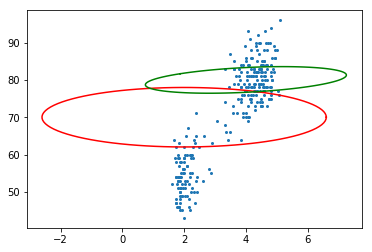

In [1]:
import csv, copy, gzip, pickle

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2

%matplotlib inline

with open('data/faithful.txt', 'rt') as csvfile:
    dataReader = csv.reader(csvfile, delimiter=' ')
    # initialize an empty array
    data = []
    for row in dataReader:
        data.append(np.array(row).astype(np.float))
    # convert data into a numpy array
    data = np.asarray(data)
    
ngmm = 2 # quantity of Gaussian Mixture Model
mu = np.asarray([[2, 70], 
                 [4, 80]]
               ).astype('float')

sigma = np.asarray([[[1, 0], 
                     [0, 3]], 
                    [[0.5, 0.2], 
                     [0.2, 0.6]]]
                  ).astype('float')
def covmatIsLegal(sigma):
    for covmat in sigma:
        if not(np.allclose(covmat, covmat.T)) or np.any(np.linalg.eigvals(covmat) <= 0):
            return False
    return True

print("Convariance Matrices are Legal? : %r" % covmatIsLegal(sigma))
gmm = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0/ngmm} for m in range(ngmm)]

def plotGaussianModel2D(mu, sigma, pltopt='k'):
    if sigma.any():
        # calculate ellipse constants
        c = chi2.ppf(0.9, 2) # use confidence interval 0.9
        # get eigen vector and eigen values
        eigenValue, eigenVector = np.linalg.eig(sigma)
        # calculate points on ellipse
        t = np.linspace(0, 2*np.pi, 100) # draw 100 points
        u = [np.cos(t), np.sin(t)]
        w = c * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
        z = w.T + mu
    else:
        z = mu
    # plot ellipse by connecting sample points on curve
    plt.plot(z[:,0], z[:,1], pltopt)
    
def colorPicker(index):
    colors = 'rgbcmyk'
    return colors[np.remainder(index, len(colors))]

def gmmplot(data, gmm):
    # plot data points
    plt.scatter(data[:, 0], data[:, 1], s=4)
    # plot Gaussian model
    color = 'rgb'
    for index, model in enumerate(gmm):
        plotGaussianModel2D(model['mean'], model['covariance'], colorPicker(index))

gmmplot(data, gmm)
gmm = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0/ngmm} for m in range(ngmm)]


### Optimizing Covariance and Priors

Optimizing the covariance is as simple as calling maximization instead of maximization_mean.  Maximization updates the means as before, but also calculates the priors and values of the covariance matrices for each cluster.  Unfortunately, there appears to be a bug in my implementation of this function that cascades down to affect the updated means and corrupts the output.  Despite my best efforts to fix it and comparing my implementation with a peer's working solution line-by-line, tracing intermediate variable values, etc, I have been unable to fix it, but I am convinced that, while it may have a large impact on the data, it is a small error somewhere that causes values to diverge.  Updating the priors and covariance matrices follows the EM equations for the priors and $\sum_{k}$, respectively.

There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 3.6 79. ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 1.8 54. ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 3.333 74.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 2.283 62.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure

xn: [ 1.883 51.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 4.933 86.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 2.033 53.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 3.733 79.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 4.233 81.   ]
mean: [ 4.383 82.   

There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 3.917 71.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 4.45 83.  ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 2. 56.]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure why it does this but it messes things up
xn: [ 4.283 79.   ]
mean: [ 4.383 82.   ]
covar: [[ 6.53095993e-20 -3.48005886e-32]
 [-3.48005886e-32  7.42457323e-31]]
prior: 5.0775642727696796e-18
There was an error calculating p_k_xn.  Not sure

/home/jonsnow/Repositories/bmcfarland491/gmmlib.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  posteriors[n] = [i/mean_normalizers[k] for i in posteriors[n]]
/home/jonsnow/Repositories/bmcfarland491/gmmlib.py:33: RuntimeWarning: invalid value encountered in double_scalars
  posteriors[n] = [i/mean_normalizers[k] for i in posteriors[n]]
/home/jonsnow/Repositories/bmcfarland491/gmmlib.py:77: RuntimeWarning: invalid value encountered in true_divide
  mean /= p_k # normalize the mean


LinAlgError: Array must not contain infs or NaNs

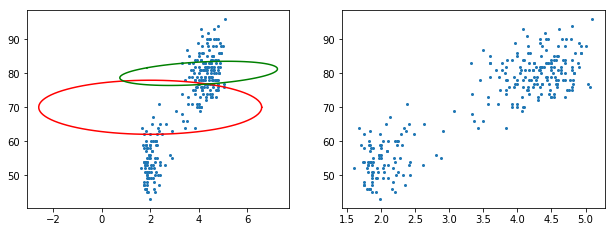

In [3]:
from gmmlib import expectation, maximization, maximization_mean

# make a true copy of our model
gmmcp = copy.deepcopy(gmm)

# create figure
plt.figure(figsize=(16, 8))
# improve model with EM-Algorithm
# fixed number of iterations so it doesn't crash from diverging values
for i in range(5):
    # plot current status
    plt.subplot(231 + i)
    gmmplot(data, gmmcp)
    # excute EM-Algorithm
    for j in range(5):
        posterior = expectation(data, gmmcp)
        gmmcp = maximization(posterior, data, gmmcp)
# plot final status
plt.subplot(236)
gmmplot(data,gmmcp)